<a href="https://colab.research.google.com/github/KalyaniTBhandwalkar/Assignment/blob/main/Stock_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import warnings
warnings.filterwarnings("ignore")
from nsetools import Nse

# Now, creating a Nse object

nse = Nse()

# printing the Nse object

print(nse)

Driver Class for National Stock Exchange (NSE)


In [ ]:
top_gainers = nse.get_top_gainers(10)
for i in  range(10):
    
    print(top_gainers[i]['symbol']) 

JSWSTEEL
DIVISLAB
HINDUNILVR
CIPLA
ASIANPAINT
GRASIM
KOTAKBANK
NTPC
SUNPHARMA
TATACONSUM


In [ ]:
losers = nse.get_top_losers(10)
for i in  range(10):
    top=losers[i]['symbol']
    print(losers[i]['symbol'])
    

INDUSINDBK
BHARTIARTL
HDFC
HDFCBANK
RELIANCE
APOLLOHOSP
TCS
HEROMOTOCO
HCLTECH
BAJAJFINSV


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import snscrape.modules.twitter as sntwitter
import nltk

nltk.download('vader_lexicon') #required for Sentiment Analysis


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kalyani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Sentiment analysis of tweets from Tweeter

## Top gainer anf loser stocks

In [ ]:
#Get user input

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text
def percentage(part,whole):
    return 100 * float(part)/float(whole)
def process(query):
    #As long as the query is valid (not empty or equal to '#')...
    if query != '':
        noOfTweet = 100
        if noOfTweet != '' :
            noOfDays = 5
            if noOfDays != '':
                    #Creating list to append tweet data
                    tweets_list = []
                    now = dt.date.today()
                    now = now.strftime('%Y-%m-%d')
                    yesterday = dt.date.today() - dt.timedelta(days = int(noOfDays))
                    yesterday = yesterday.strftime('%Y-%m-%d')
                    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query + ' lang:en since:' +  yesterday + ' until:' + now + ' -filter:links -filter:replies').get_items()):
                        if i > int(noOfTweet):
                            break
                        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

                #Creating a dataframe from the tweets list above 
                    df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
                #applying this function to Text column of our dataframe
                    df["Text"] = df["Text"].apply(cleanTxt)
    #Assigning Initial Values
    positive = 0
    negative = 0
    neutral = 0
    #Creating empty lists
    tweet_list1 = []
    neutral_list = []
    negative_list = []
    positive_list = []

    #Iterating over the tweets in the dataframe
    for tweet in df['Text']:
        tweet_list1.append(tweet)
        analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = analyzer['neg']
        neu = analyzer['neu']
        pos = analyzer['pos']
        comp = analyzer['compound']
        if neg > pos:
            negative_list.append(tweet) #appending the tweet that satisfies this condition
            negative += 1 #increasing the count by 1
        elif pos > neg:
            positive_list.append(tweet) #appending the tweet that satisfies this condition
            positive += 1 #increasing the count by 1
        elif pos == neg:
            neutral_list.append(tweet) #appending the tweet that satisfies this condition
            neutral += 1 #increasing the count by 1 
    positive_per = percentage(positive, len(df)) #percentage is the function defined above
    negative_per = percentage(negative, len(df))
    neutral_per = percentage(neutral, len(df))
    return positive_per,negative_per,neutral_per,df

 # Top gain stock sentiment    
for i in  range(5):
    query=top_gainers[i]['symbol']
positive_gain,negative_gain,neutral_gain,df1=process(query)

# Top gain stock sentiment
for i in  range(5):
    query=losers[i]['symbol'] 
positive_loser,negative_loser,neutral_loser,df2=process(query)


## Top loser stock

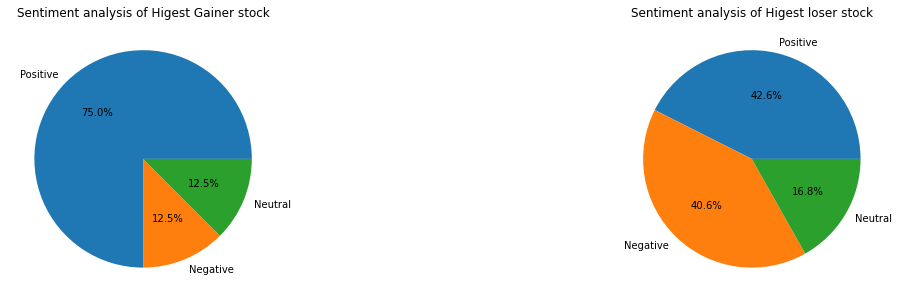

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20,5))


sent_gain=["Positive","Negative","Neutral"]
per_gain=[positive_gain,negative_gain,neutral_gain]
axs[0].pie(per_gain ,labels = sent_gain,  autopct = '%1.1f%%')
axs[0].set_title('Sentiment analysis of Higest Gainer stock')

sent_los=["Positive","Negative","Neutral"]
per_los=[positive_loser,negative_loser,neutral_loser]
axs[1].pie(per_los,labels = sent_los,  autopct = '%1.1f%%')
axs[1].set_title('Sentiment analysis of Higest loser stock')
plt.show()


**Analysis:**
1. As the data collected from NSE, 
   are

*  Top gainer stocks
  1.JSWSTEEL
  2.DIVISLAB
  3.HINDUNILVR
  4.CIPLA
  5.ASIANPAINT
  6.GRASIM
  7.KOTAKBANK
  8.NTPC
  9.SUNPHARMA
  10.TATACONSUM
*  Top Loser stocks
  1.INDUSINDBK
  2.BHARTIARTL
  3.HDFC
  4.HDFCBANK
  5.RELIANCE
  6.APOLLOHOSP
  7.TCS
  8.HEROMOTOCO
  9.HCLTECH
  10.BAJAJFINSV
2. I have analysed the tweets from last five days to make sentimental analysis of the tweets related to top gainer and loser stocks.
3. with reference to the data collected on 13/07/2022 ,
The sentiment analysis is don and visualization is represented by using pie chart.



  

